In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

## Part 1:

In [2]:
h = const.h
c = const.c
k = const.k_B
def PlanckFunction(T, λ): #Creating a python function to simplify the Planck function.
    T = u.Quantity(T, unit=u.K)
    λ = u.Quantity(λ, unit=u.micron)
    return(((2*h*(c**2))/(λ**5))*(1/(np.exp((h*c)/(λ*k*T))-1)))

In [3]:
PlanckFunction(5000,0.5)

<Quantity 1.21071906e-17 J m2 / (micron5 s)>

In [4]:
NewFunction = PlanckFunction(5000,0.5).decompose() #The Planck function decomposed to remove redundant and duplicated units.
NewFunction #The decomposed Planck function printed.

<Quantity 1.21071906e+13 kg / (m s3)>

In [5]:
NewFunction2 = NewFunction.to((u.kilowatt)*(u.m**-2)*(u.nm**-1)) #We converted it from kg/m^-1 s^-3 to kW/m^-2 nm^-1
NewFunction2 #The converted Planck function printed.

<Quantity 12.10719059 kW / (m2 nm)>

In [6]:
T = u.Quantity(5000, unit=u.K)
LambdaPeak = const.b_wien/T #The equation to find the peak wavelength when T=5000.
LambdaPeak

<Quantity 5.79554391e-07 m>

In [7]:
xlist=np.linspace(.1,3,290) #Generating the x values for the three different Planck functions that we will graph.
yListThree = []
yListFour = []
yListFive = [] #Empty lists to hold the spectral radiance values for the different temperatures.

for x in xlist:
    PlanckFunctionThree = PlanckFunction(3000, x) #Running the Planck function from before, but we changed T to be 3000 Kelvin, and we are changing the wavelength from .1 to 3.
    PlanckFunctionThree = (PlanckFunctionThree.to((u.kilowatt)*(u.m**-2)*(u.nm**-1)))*((u.kilowatt**-1)*(u.m**2)*(u.nm**1)) #To remove the units from the results, so that we are left with just the quantity.
    yListThree.append(PlanckFunctionThree) #Appended to the holding list we had created earlier.
for x in xlist:
    PlanckFunctionFour = PlanckFunction(4000, x)
    PlanckFunctionFour = (PlanckFunctionFour.to((u.kilowatt)*(u.m**-2)*(u.nm**-1)))*((u.kilowatt**-1)*(u.m**2)*(u.nm**1))
    yListFour.append(PlanckFunctionFour)

for x in xlist:
    PlanckFunctionFive = PlanckFunction(5000, x)
    PlanckFunctionFive = (PlanckFunctionFive.to((u.kilowatt)*(u.m**-2)*(u.nm**-1)))*((u.kilowatt**-1)*(u.m**2)*(u.nm**1))
    yListFive.append(PlanckFunctionFive)

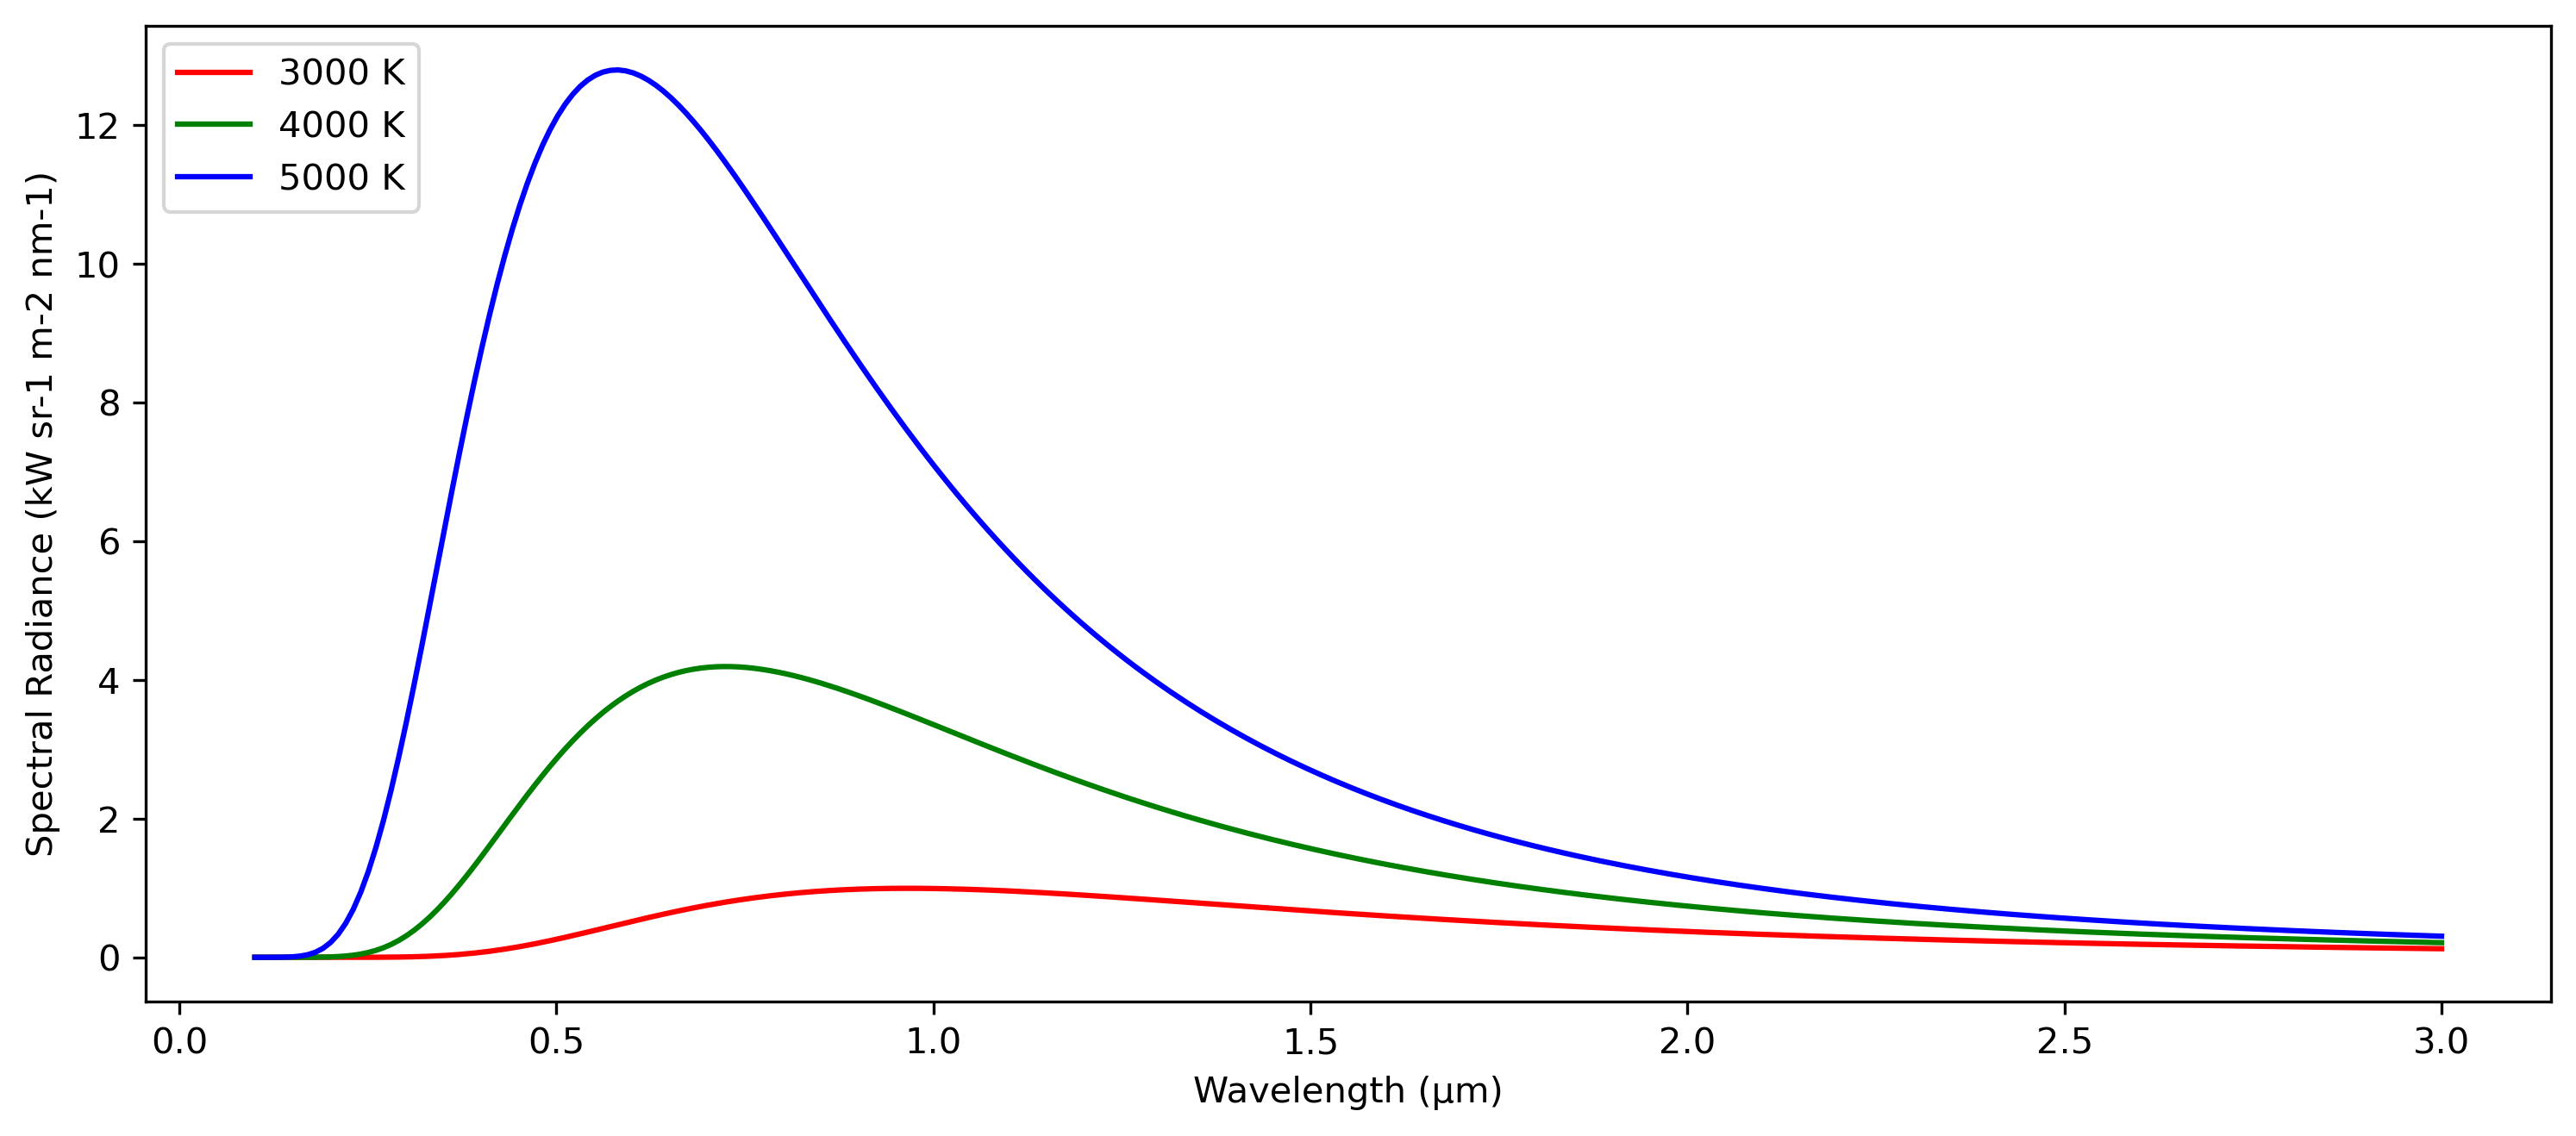

In [8]:
plt.figure(figsize=(12, 5), dpi=300) #Outlining the size and resolution of the graph.
plt.plot(xlist,yListThree,'r',label='3000 K') #Plotting the results from the three different temperatures.
plt.plot(xlist,yListFour,'g',label='4000 K')
plt.plot(xlist,yListFive,'b',label='5000 K')
plt.legend(loc='upper left') #Placing the legend in the top left to replicate the one from wikipedia.
plt.xlabel(r'Wavelength (μm)') #Labeling the x and y axes.
plt.ylabel(r'Spectral Radiance (kW sr-1 m-2 nm-1)')
plt.show()